# Convolutional Neural Networks - Introduction
In my [last post](TODO ADD LINK), we built a Neural Network that categorised fruit images into 60 different classes. But we did it using some helper functions that I wrote to lower down the complexity! In this post, we will go a little into the nuts and bolts of what are Convolutional Neural Networks used in the last post. I'll also be addressing some concepts that I just introduced in the last post.

## What is Convolution?
Convolution is a mathematical operation which we will denote by `conv(x, kernel)`. By the notation itself, we are conveying that there are two main things involved - `x` (a large tensor) and a `kernel` (a small tensor).

> **Tensor: ** A tensor is an N-Dimensional array. Example: an image has 3 dimensions- Height, Width and Number of Channels (3 if RGB image 1 if Grayscale image.)

### How do Convolution Works?
Convolution, in general, involves these steps:

**1) Start from top left corner of tensor `x`.**

<img src="images/X.jpg" style="width:50%">

**2) Take a `slice` of `x` having size similar to `kernel`.**

<img src="images/slice.jpg" style="width:50%">

**3) Do element-wise multiplication of the `slice` and `kernel`.**
<img src="images/element-wise-mul.jpg" style="width:50%">
**4) Sum over the result of the previous step to get a single value.**
<img src="images/step4.jpg" style="width:50%">
**5) Add it to the `output` tensor.**
<img src="images/step5.jpg" style="width:50%">


**6) Slide from current position on tensor `x` to the left (or bottom if you are at the end of a row of `x`) by `s`.**

**7) Repeat steps 2 to 6 till you slide to bottom right corner of `x`**
<img src="images/convolve.gif">

### What is a Kernel?
In simple words, a kernel (aka filter) is a tensor that tries to find hidden representation in the input tensor `x`. Since `x` is input, it cannot be changed. This means that the only thing that sits between a Convolutional Neural Network's (CNN's) predictions and the input are these filters.

In my [last post](TODO ADD LINK), I talked about representation learning! Consider having 100s of these filters, each giving a new representation to the input `x`. Our Neural Network will have much more information from just 1 input `x`. 

Consider `n1` number of filters working on `x`. Say, `x` is an RGB image and each of the `n1` produces a matrix (2 dimensional tensor) from `x`. This means we have `n1` representations from `x`. Stacking these up will give us a new image which has `n1` channels (instead of 3 in case of RGB). If all the `n1` filters are tuned to catch different type of edges in image `x`, we have `n1` edge based representations of `x`. Passing this new representation through `n2` filters that can join edges to make objects will give us `n2` representations from `n1`. And we can go on to form layered phenomenon which helps us detect presence of objects in images! For a concrete example, look at the images below wherein a layer is multiple convolutional filters applied to input. The image displays the filters (darkened matrices) what the filters detect (colored images).

![](images/visualize_cnn.png)
<p style="text-align:center">Source https://arxiv.org/abs/1311.2901</p>

In [1]:
from utils import *
from PIL import Image
import numpy as np

%matplotlib inline

### Let's Play Around With Kernels!
Let's visualize some kernels and their effect on an image.

**Our Input Image: **

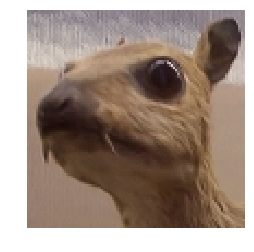

In [2]:
img = Image.open('images/temp.png')
img = np.array(img)

imshow(img)

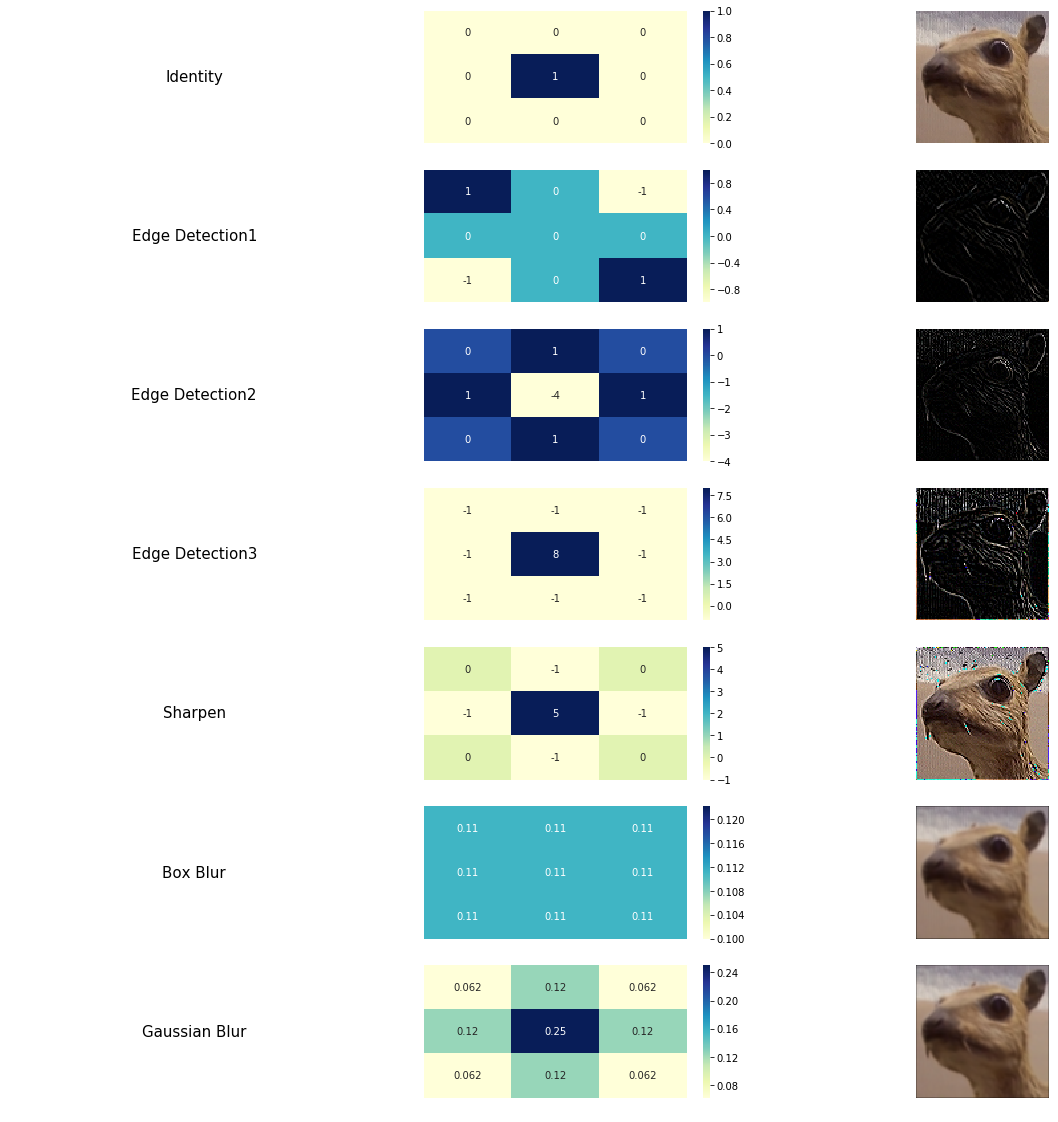

In [3]:
plot_with_kernels(img)

### Zero Padding in Convolutions!
As we now know how convolution works, the important question is whether we mantain the width and height of output same as the input or not. And the answer is - we improvise! There are ways through which we can make sure that the height and width of the output is mantained. However, sometimes we let it shrink after convolutions! We do this for many reasons but many-a-times it is simply to avoid too many pixels to deal with. We will see ahead that there are other better ways to downsample the image. So, to mantain height and width, we apply a padding of 0s on these two parameters of the image before applying convolutions. Most deep learning frameworks have two kinds of paddings - 'same' and 'valid'.

* 'same' padding means that the output is similar in height and width to input!
* 'valid' padding means no padding which means the operation works only on the input and not some padded form of it!

## How to get these Magic Filters?
We have talked about convolution filters being super useful and exceptionally amazing at capturing the latent representations of the input. But how do we get so many filters? That's where the "learning" part of deep learning begins! When we design a Convolutional Neural Network, we give these filters random values. This means network, when designed and initialized, is as useless as a person staring at a wall!

We then pass the images to the network in groups called mini-batches and ask network to find the error between actual categories the images belong to and the categories predicted by the untrained network. This error gives a rough idea to the network of a curve that defines relationship between the kernel values (more generally known as weights) and the error/loss function (J(w) function of weights) itself. Since we are more habitual of seeing a 2 dimensional representation, let's consider a single weight value v/s loss function graph.

![](images/w_vs_jw.png)

Now, consider yourself being stuck at the place of initial value of W. To stop yourself from falling, you will try to reach that lowermost point where the value of J(w), or more clearly our loss function, will be minimum! We apply the same concept to the network by slowly changing the values of weights in the direction of decreasing loss. However, since we do it using multiple layers of filters each stacked over one another, we do it in a chain of operations - error propagates from last layer to first layer adjusting weights of each layer by a little. This algorithm is known as backpropagation.

> We will be discussing backpropagation in depth in future posts!

### Non-Linearities - The World isn't Linear!
So far... all the operations we performed required some basic multiplications and additions which didn't add any non-linearity to our input. However, data, as we know, is not a linear quantity. Our world is full of non-linearities! To really predict a value which is dependent on non-linear data, we need to catch the point of separation between these non-linear data points. We achieve this by utilizing some famous non-linear functions (aka activation functions). 

Let's have a look at some of these functions and their graphs!

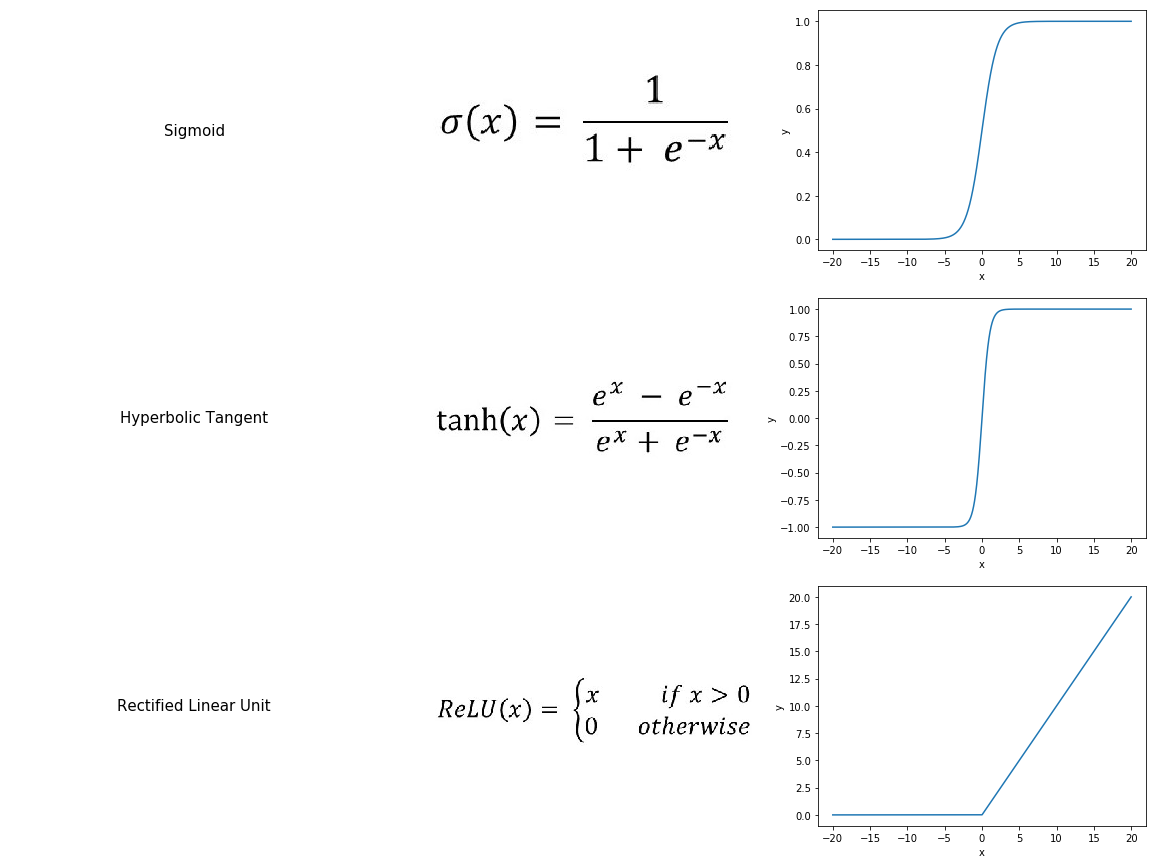

In [4]:
plot_activations()

### Down Sampling by Pooling Layers!
An image can have thousands or millions of pixels which we need to account for. To reduce the underlying complexity in these enormous amounts of pixels, we can use downsampling (aka sub-sampling). This is done by pooling layers! Whoa!

Pooling Layers can be of many types. For example: Max Pool, Average Pool, Sum Pool etc and they literally do what is meant from their names. Consider Max Pooling, for instance. We take a window from the input tensor of size say n by n and find the maximum value from this window. Then, we stride ahead by `s` and repeat it from top to bottom and left to right as displayed in the animation!

<img src="images/maxpool.gif" style="width:70%">

Similarly, in Average Pool, we take the mean of the values in window whereas in Sum Pool, we sum them up. Max Pool is more generally used in most well-known architectures!

The concept of padding remains the same here!

## Convolutional Neural Network In Keras!
[Keras](https://keras.io/) is a higher level Deep Learning Library built over other frameworks. It uses some extensive frameworks (like TensorFlow, Theano, Caffe, CNTK) at its backend to lower down the complexity of defining, training and using a Deep Learning Model.

I'll be using Keras with Google's TensorFlow as backend here. You can keep any other framework at backend!

![](images/keras-tensorflow-logo.jpg)


In Last tutorial, I gave you a function to get the model. This time, I'll be loading same model directly. Let's see its structure today as we have already seen it work in the [last post](TODO ADD LINK)!

Let's import our layers from keras. We will need Conv2D (for Convolution), Input layer (for making an input point in model), MaxPool2D (for max pooling), Dense and Flatten layer.


But we haven't yet learnt about Dense and Flatten! Let's have a crash course on them!

### Flatten Layers
The easiest one to explain. Take a tensor and flatten it such that the output of the layer is of the shape of a 2D array. Say, you input a tensor of shape \[32, 6, 6, 256\] where 32 is the mini-batch size and 6x6 is the output of a convolution or a max pool layer with 256 channels. The output of the flatten layer will be a 2D tensor with shape \[32, 6\*6\*256\] or \[32, 9216\]. 

More generally, when a tensor is passed to a `Flatten` layer then the first axis of the tensor is untouched while other axes' shapes are multiplied to get the new tensor shape!

But why do we do it? In order to resolve tensor compatibility issues with dense layers which only take 2D arrays as input.

### Dense Layers
Dense Layers (aka Fully Connected Layers) implies that every neuron in the previous layer is connected to every neuron in the current layer. The high level features gathered by convolution and max pool layers are used by this layer for classification! For example, if the previous layer gives an output of a tensor of shape \[32, 9216\] and we have 1024 neurons in the current Dense layer then the number of weights required by the layer will be (9216 * 1024) + 1024 = 9,438,208 weights (+1024 for bias terms which we will study in future post!)

![](images/dense_layer.jpg)

In [5]:
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPool2D
from keras.models import Model

Using TensorFlow backend.


### Model To Build!
We will be building a 17 layer deep CNN using keras!

Let's see the architecture we will be building!!

<img src="images/model.png" style="height:1000px">

In [6]:
INPUT_SHAPE = [100, 100, 3]
N_CLASSES = 60

In [7]:
x0 = Input(INPUT_SHAPE)

x = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x0)
x = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
x = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
x = MaxPool2D()(x)

x = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
x = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
x = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
x = MaxPool2D()(x)

x = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
x = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
x = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
x = MaxPool2D()(x)

x = Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
x = Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
x = MaxPool2D()(x)

x = Flatten()(x)

x = Dense(1024, activation='relu')(x)

preds = Dense(N_CLASSES, activation='softmax')(x)

model = Model(inputs=x0, outputs=preds)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Keras models have a special function - `summary()`, that lets us know the number of parameters used by each layer and total parameters in the model.

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 64)        36928     
__________

We can now train this model on any data using `fit()` function and predict on some new data using `predict()` function both used in [last post](TODO ADD LINK)!

With this we reach the end of this post. In next post we will be looking at NN architectures for structured data.

In mean time try your hands on some kaggle competitions for Image recognition. :)